In [1]:
import numpy as np
import matplotlib.pyplot as plt

def dist_th(th_var, th1, th_period):
    ## Account for periodicity
    th_var1 = (th_var%th_period)
    del1_th1 = (np.abs(th_var1 - th1))
    del2_th1 = (np.abs(th1 + th_period - th_var1))
    del_th1 = np.minimum(del1_th1, del2_th1)
    return del_th1

def func_val(del_th, dth1, a1, h1):
    y_val = 0*del_th
    nsz = np.size(del_th)
    for ct1 in range(nsz):
        dth = del_th[ct1]
        if dth == 0:
            y_val[ct1] = a1
        elif (dth <= dth1) and (dth > 0):
            dth_sc = dth/dth1
            y_val[ct1] = ((h1-a1)*(dth_sc)*(1 - np.log(dth_sc)) + a1)
        elif (dth > dth1):
            y_val[ct1] = h1
    return y_val

In [2]:
## Global Mean-Energy parameter
h = 400 ## mJ/m^2
## Randomly initialized to satisy the constraint h1*h2*h3 = h
h1 = h**(1.0/3.0)
h2 = h**(1.0/3.0)
h3 = h**(1.0/3.0)

## Cusp-1
th1 = 0
E1 = 0 ## mJ/m^2
# Parameters
dth1 = 15*np.pi/180 ## degrees
a1 = 0 ## a1*h2*h3 = E1

## Cusp-2
th2 = 65.46779329*np.pi/180
E2 = 75.19372177 ## mJ/m^2
# Parameters
dth2 = 10*np.pi/180
a2 = E2/(h1*h3) ## a2*h1*h3 = E2


## Cusp-3
th3 = 127.83322536*np.pi/180
E3 = 150.7627575 ## mJ/m^2
# Parameters
dth3 = 10*np.pi/180
a3 = E3/(h1*h2) ## a3*h1*h2 = E3

print([a1,h1])
print([a2,h2])
print([a3,h3])

[0, 7.368062997280773]
[1.3850801975034068, 7.368062997280773]
[2.777073737259411, 7.368062997280773]


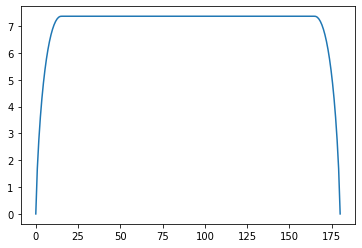

In [3]:
## Plot function w.r.to Cusp-1
th_var = np.linspace(0, np.pi, 201)
del_th1 = dist_th(th_var, th1, np.pi)
eng_y1 = func_val(del_th1, dth1, a1, h1)

plt.plot(th_var*180/np.pi, eng_y1)

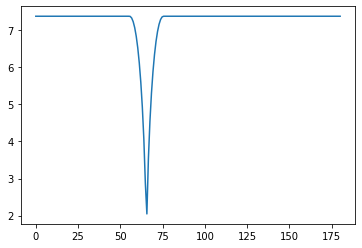

In [4]:
## Plot function w.r.to Cusp-2
# th_var = np.linspace(-2*np.pi, 2*np.pi, 201)
th_var = np.linspace(0, np.pi, 201)
del_th2 = dist_th(th_var, th2, np.pi)
eng_y2 = func_val(del_th2, dth2, a2, h2)

plt.plot(th_var*180/np.pi, eng_y2)

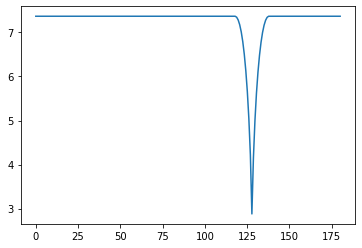

In [5]:
## Plot function w.r.to Cusp-3
# th_var = np.linspace(-2*np.pi, 2*np.pi, 201)
th_var = np.linspace(0, np.pi, 201)
del_th3 = dist_th(th_var, th3, np.pi)
eng_y3 = func_val(del_th3, dth3, a3, h3)

plt.plot(th_var*180/np.pi, eng_y3)


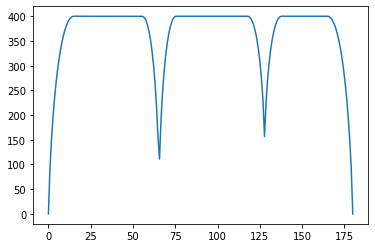

In [8]:
## Product Function
eng_y = eng_y1*eng_y2*eng_y3
# print(eng_y)
plt.plot(th_var*180/np.pi, eng_y)

2288046.430056022